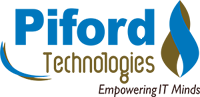


# Multinomial Naive Bayes


In [33]:
import numpy as np
#from sklearn.naive_bayes import MultinomialNB

import pandas as pd

df = pd.read_csv('first_batch.csv')


In [18]:
df


,Unnamed: 0,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,0,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.390000e+12
1,1,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.390000e+12
2,2,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.390000e+12
3,3,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.390000e+12
4,4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.390000e+12
...,...,...,...,...,...,...,...,...
60,60,"GM recalls another 2.4M vehicles for belts, ba...",http://www.usatoday.com/story/money/cars/2014/...,USA TODAY,t,dlM9gF_cqok-hPMsoTxBgF_NUJ3PM,www.usatoday.com,1.400000e+12
61,61,Business update: Parade of GM recalls rolls on...,http://www.indeonline.com/article/20140520/NEW...,Massillon Independent,t,dlM9gF_cqok-hPMsoTxBgF_NUJ3PM,www.indeonline.com,1.400000e+12
62,62,GM keeps recalling vehicles,http://www.shanghaidaily.com/article/article_x...,Shanghai Daily \(subscription\),t,dlM9gF_cqok-hPMsoTxBgF_NUJ3PM,www.shanghaidaily.com,1.400000e+12
63,63,More GM recalls,http://www.cbc.ca/news/business/new-gm-recall-...,CBC.ca,t,dlM9gF_cqok-hPMsoTxBgF_NUJ3PM,www.cbc.ca,1.400000e+12


In [ ]:
df['CATEGORY'].value_counts()  # b- business, t- technology, e-entertainment


e    32
t    22
b    11
Name: CATEGORY, dtype: int64

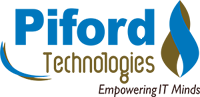


# Basics of NLP


In [2]:
import nltk
# nltk.download()
from nltk import word_tokenize

data = "Piford Technologies is a Software Development company. Piford also provide trainings."
print(word_tokenize(data))


['Piford', 'Technologies', 'is', 'a', 'Software', 'Development', 'company', '.', 'Piford', 'also', 'provide', 'trainings', '.']


In [3]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))
print(stopWords)


{'were', 'above', 'until', 'under', 'your', 'then', 'mightn', 'just', 'are', 't', 'i', 'as', 'isn', 'themselves', 'not', 'each', 'haven', 'we', 'my', 'doesn', 'only', 'other', 've', "it's", 'too', 'her', 'down', 'has', 'weren', "isn't", 'at', "won't", 'from', 'myself', 'aren', 'yourselves', 'them', 'herself', 'what', 'no', 'doing', 'the', 'y', 'in', 'but', "mustn't", 'me', "you'll", 'ma', 'through', 'where', "you're", 'further', 'wouldn', 'was', 'and', 'on', "wasn't", 'being', 'his', 'all', 'ourselves', 'some', "doesn't", 'yourself', 'below', 'ours', 'theirs', 'don', 'itself', 'you', 'few', 'how', 'do', 'most', "aren't", 'against', 'am', 'to', 'over', 'll', 'which', 'of', 'with', "hasn't", 'same', 'any', 'during', 'it', 'an', "shan't", 'should', 'will', 'hers', 'up', "she's", 'if', "shouldn't", 'so', 'o', "hadn't", 'mustn', 'before', 'such', 'hasn', 'yours', 'than', 'he', 'there', 'been', 'or', 'have', 'whom', 'off', 'didn', 'm', 'is', 'both', 'she', 'be', 'because', 'now', "wouldn't",

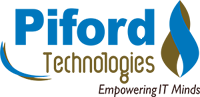


In [9]:
import string
data = "Piford's Technologies, Piford is in Mohali !."
data_1 = [char for char in data if char not in string.punctuation]
print(data_1)


['P', 'i', 'f', 'o', 'r', 'd', 's', ' ', 'T', 'e', 'c', 'h', 'n', 'o', 'l', 'o', 'g', 'i', 'e', 's', ' ', 'P', 'i', 'f', 'o', 'r', 'd', ' ', 'i', 's', ' ', 'i', 'n', ' ', 'M', 'o', 'h', 'a', 'l', 'i', ' ']


In [10]:
data_1 = ''.join(data_1)
print(data_1)


Pifords Technologies Piford is in Mohali 


In [11]:
data_1 = data_1.split()  # word_tokenize(data)
print(data_1)


['Pifords', 'Technologies', 'Piford', 'is', 'in', 'Mohali']


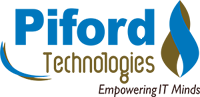


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
data_1 = ["Piford Technologies Piford is in Mohali."]

# create the transform
vectorizer = CountVectorizer()

vectorizer.fit(data_1)


print(vectorizer.vocabulary_)


{'piford': 3, 'technologies': 4, 'is': 1, 'in': 0, 'mohali': 2}


In [14]:
"""encode document"""
vector = vectorizer.transform(data_1)
print(vector)


  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (0, 4)	1


In [15]:
def text_cleaning(a):
    remove_punctuation = [char for char in a if char not in string.punctuation]
    # print(remove_punctuation)
    remove_punctuation = ''.join(remove_punctuation)
    # print(remove_punctuation)
    return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]


In [19]:
df.head()


,Unnamed: 0,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,0,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.390000e+12
1,1,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.390000e+12
2,2,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.390000e+12
3,3,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.390000e+12
4,4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.390000e+12


In [22]:
# data after removing punctuation and stop words
print(df.iloc[:, 1].apply(text_cleaning))


0     [Fed, official, says, weak, data, caused, weat...
1     [Feds, Charles, Plosser, sees, high, bar, chan...
2     [US, open, Stocks, fall, Fed, official, hints,...
3     [Fed, risks, falling, behind, curve, Charles, ...
4     [Feds, Plosser, Nasty, Weather, Curbed, Job, G...
                            ...                        
60    [GM, recalls, another, 24M, vehicles, belts, b...
61    [Business, update, Parade, GM, recalls, rolls,...
62                     [GM, keeps, recalling, vehicles]
63                                        [GM, recalls]
64                     [10, largest, GM, recalls, year]
Name: TITLE, Length: 65, dtype: object


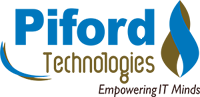


In [24]:

from sklearn.feature_extraction.text import CountVectorizer
bow_transformers = CountVectorizer(analyzer=text_cleaning).fit(df['TITLE'])

# print(len(bow_transformers.vocabulary_))
bow_transformers.vocabulary_


{'Fed': 61,
 'official': 202,
 'says': 221,
 'weak': 243,
 'data': 171,
 'caused': 167,
 'weather': 244,
 'slow': 224,
 'taper': 229,
 'Feds': 62,
 'Charles': 38,
 'Plosser': 109,
 'sees': 222,
 'high': 183,
 'bar': 160,
 'change': 168,
 'pace': 205,
 'tapering': 230,
 'US': 141,
 'open': 203,
 'Stocks': 131,
 'fall': 176,
 'hints': 184,
 'accelerated': 155,
 'risks': 219,
 'falling': 177,
 'behind': 162,
 'curve': 170,
 'Nasty': 96,
 'Weather': 147,
 'Curbed': 45,
 'Job': 81,
 'Growth': 73,
 'May': 86,
 'Accelerate': 18,
 'Tapering': 136,
 'Pace': 104,
 'Taper': 135,
 'may': 195,
 'expects': 175,
 'unemployment': 236,
 '62': 14,
 'end': 174,
 '2014': 4,
 'jobs': 190,
 'growth': 182,
 'last': 193,
 'month': 197,
 'hit': 185,
 'weatherFed': 245,
 'President': 113,
 'ECB': 54,
 'unlikely': 237,
 'sterilisation': 225,
 'SMP': 121,
 'purchases': 207,
 'traders': 235,
 'sterilization': 226,
 'Box': 32,
 'Office': 102,
 'XMen': 153,
 'Days': 50,
 'Future': 68,
 'Past': 106,
 'Nabs': 95,
 '26

In [26]:
title_bow = bow_transformer.transform(df['TITLE'])

print(title_bow)


  (0, 61)	1
  (0, 167)	1
  (0, 171)	1
  (0, 202)	1
  (0, 221)	1
  (0, 224)	1
  (0, 229)	1
  (0, 243)	1
  (0, 244)	1
  (1, 38)	1
  (1, 62)	1
  (1, 109)	1
  (1, 160)	1
  (1, 168)	1
  (1, 183)	1
  (1, 205)	1
  (1, 222)	1
  (1, 230)	1
  (2, 61)	1
  (2, 131)	1
  (2, 141)	1
  (2, 155)	1
  (2, 176)	1
  (2, 184)	1
  (2, 202)	1
  :	:
  (60, 69)	1
  (60, 158)	1
  (60, 159)	1
  (60, 163)	1
  (60, 213)	1
  (60, 240)	1
  (61, 7)	1
  (61, 36)	1
  (61, 69)	1
  (61, 105)	1
  (61, 213)	1
  (61, 220)	1
  (61, 238)	1
  (61, 240)	1
  (62, 69)	1
  (62, 191)	1
  (62, 212)	1
  (62, 240)	1
  (63, 69)	1
  (63, 213)	1
  (64, 2)	1
  (64, 69)	1
  (64, 192)	1
  (64, 213)	1
  (64, 249)	1


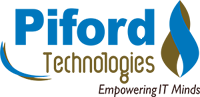


In [27]:
X = title_bow.toarray()
print(X)


X.shape  # 77,257  # 257 seperate words in our dataset and 77 rows


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


(65, 256)

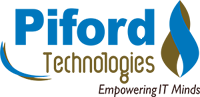


In [28]:

# TF-IDF Algo -term frequency-inverse document frequency to know the most significant words

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(title_bow)
print(tfidf_transformer)

title_tfidf = tfidf_transformer.transform(title_bow)
print(title_tfidf)  # got tfidf values for whole vocabulary
print(title_tfidf.shape)  # (77, 257)


TfidfTransformer()
  (0, 244)	0.35477264027465666
  (0, 243)	0.35477264027465666
  (0, 229)	0.35477264027465666
  (0, 224)	0.32278160612728646
  (0, 221)	0.32278160612728646
  (0, 202)	0.32278160612728646
  (0, 171)	0.32278160612728646
  (0, 167)	0.35477264027465666
  (0, 61)	0.28247766961965964
  (1, 230)	0.33258913256553785
  (1, 222)	0.36555219519046506
  (1, 205)	0.33258913256553785
  (1, 183)	0.36555219519046506
  (1, 168)	0.36555219519046506
  (1, 160)	0.36555219519046506
  (1, 109)	0.2528507396807884
  (1, 62)	0.29106058500399523
  (1, 38)	0.30920146743562676
  (2, 230)	0.3250877985152921
  (2, 203)	0.35730740045597703
  (2, 202)	0.3250877985152921
  (2, 184)	0.35730740045597703
  (2, 176)	0.3250877985152921
  (2, 155)	0.35730740045597703
  (2, 141)	0.3022276271355269
  :	:
  (60, 213)	0.30863342900757507
  (60, 163)	0.4373404919478541
  (60, 159)	0.4373404919478541
  (60, 158)	0.4373404919478541
  (60, 69)	0.2652884107464841
  (60, 7)	0.4065867120677751
  (61, 240)	0.2817291368

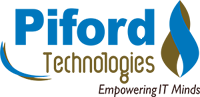


In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(title_tfidf, df['CATEGORY'])


In [31]:
all_predictions = model.predict(title_tfidf)
print(all_predictions)


['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 'e' 'e' 'e' 'e' 'e' 'e' 'e' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't'
 't' 't' 't' 't' 't' 't' 't' 't' 't' 't' 't']


In [32]:
# Printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix

confusion_matrix(df['CATEGORY'], all_predictions)


array([[11,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 22]], dtype=int64)